Далее будет использоваться датасет Thyroid_Diff  
https://archive.ics.uci.edu/dataset/915/differentiated+thyroid+cancer+recurrence

Что дальше?

Это начало лабораторной работы по Классификации.

Забираем любой датасет (кроме Iris, Wine, Abalon) по ссылке (внутри группы все датасеты должны быть разными):

 https://archive.ics.uci.edu/datasets?Task=Classification&skip=0&take=25&sort=desc&orderBy=NumHits&search=&Types=Tabular&Types=Text

  
1 часть
 1. Скачать один из наборов данных
 1. Загрузить данные в датафрейм
 1. Вывести статистическую информацию о наборе данных
 1. Вывести названия столбцов и строк
 1. Заменить категориальные данные количественными
 1. Визуализировать данные с помощью Matplotlib и Seaborn
   1. Должно быть не менее 2х визуализаций на каждый признак. Выберите самые красивые визуализации!
   1. Должно быть не менее 3х групповых визуализаций




In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

Данный датает содержит набор данных о пациентах, прошедших лечение рака щитовидной железы.  
Столбец **Recurred** говорит о том, произошел рецидив болезни или нет.
**Age** - Численное значение. Возраст пациента.  
**Gender** - Бинарное значение. Пол пациента.  
**Smoking** - Бинарное значение. Курит сейчас пациент или нет.    
**Hx Smoking** - Бинарное значение. Курил пациент в прошлом или нет.   
**Hx Radiothreapy**	- Бинарное значение. Проходил пациент радиотерапию или нет.   
**Adenopathy** - Бинарное значение. Имеется Аденопатия или нет (увеличение лимфатических узлов)  
**M** - Бинарное значение. M-стадия отражает наличие отдаленных метастазов. M0 означает, что нет признаков метастазирования, а M1 указывает на присутствие метастазов в отдаленных органах.
**Focality** - Бинарное значение. Фокальная опухоль означает, что рак локализован в одном месте, тогда как мультифокальный рак распространяется на несколько участков органа. Фокальность влияет на стратегию лечения и прогноз.  
**Thyroid Function** - Категориальные значения. Указывает на наличие и характер проблем с выработкой гормонов щитовидной железы  
**Physical Examination** - Категориальные значения. Это результат физического осмотра пациента врачом.   
**Pathology** - Категориальные значения. Указывает на характер паталогии щитовидной железы: Микропапиллярный рак, Папиллярная аденокарцинома, Фолликулярная карцинома, Карцинома из клеток Гюртле  
**Risk** - Категориальные значения. Оценка риска рецидива или прогрессирования заболевания. Низкий, средний и высокий соответственно.
**T** - Категориальные значения. T-стадия описывает размер и локализацию первичной опухоли. Стадии варьируются от T1 до T4, где T1 обозначает небольшую опухоль, ограниченную одним органом, а T4 — обширную опухоль, распространившуюся на соседние структуры.  
**N** - Категориальные значения. N-стадия указывает на наличие или отсутствие поражения региональных лимфатических узлов. N0 означает отсутствие метастазов в лимфатических узлах, а N1-N3 указывают на различную степень распространения рака на лимфатические узлы.
**Stage** - Категориальные значения. Общая оценка стадии рака, основанная на комбинации TNM-классификации. Эта классификация помогает определить степень распространения опухоли и выбрать наиболее подходящую тактику лечения.
**Response** - Категориальные значения. Показатель реакции организма на проводимое лечение. 


1-2. Загрузить данные в датафрейм

In [27]:
df = pd.read_csv('C:/Users/leous/.vscode/Data_Mining/content/Thyroid_Diff.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


3. Вывести статистическую информацию о наборе данных

In [28]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


4. Вывести названия столбцов и строк

In [29]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

5. Заменить категориальные данные количественными

In [38]:
mapping = {}
for col in df.columns:
    if df[col].unique().size == 2:
        t, f = df[col].unique()[0], df[col].unique()[1]
        mapping[col] = {True : t, False : f}
        df[col] = df[col].map({t: True, f: False})
    else:
        print(col, df[col].unique())
df.head()

Age [27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]
Thyroid Function ['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']
Physical Examination ['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']
Adenopathy ['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']
Pathology ['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']
Risk ['Low' 'Intermediate' 'High']
T ['T1a' 'T1b' 'T2' 'T3a' 'T3b' 'T4a' 'T4b']
N ['N0' 'N1b' 'N1a']
Stage ['I' 'II' 'IVB' 'III' 'IVA']
Response ['Indeterminate' 'Excellent' 'Structural Incomplete'
 'Biochemical Incomplete']


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,True,True,True,True,Euthyroid,Single nodular goiter-left,No,Micropapillary,True,Low,T1a,N0,True,I,Indeterminate,True
1,34,True,True,False,True,Euthyroid,Multinodular goiter,No,Micropapillary,True,Low,T1a,N0,True,I,Excellent,True
2,30,True,True,True,True,Euthyroid,Single nodular goiter-right,No,Micropapillary,True,Low,T1a,N0,True,I,Excellent,True
3,62,True,True,True,True,Euthyroid,Single nodular goiter-right,No,Micropapillary,True,Low,T1a,N0,True,I,Excellent,True
4,62,True,True,True,True,Euthyroid,Multinodular goiter,No,Micropapillary,False,Low,T1a,N0,True,I,Excellent,True


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    bool  
 2   Smoking               383 non-null    bool  
 3   Hx Smoking            383 non-null    bool  
 4   Hx Radiothreapy       383 non-null    bool  
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    bool  
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    bool  
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

Остальные признаки заменить на количественные не представляется возможным

In [31]:
mas_int = df.select_dtypes(include=['int64']).columns
mas_bool = df.select_dtypes(include=['bool']).columns
mas_others = df.select_dtypes(exclude=['int64','bool']).columns

6. Визуализировать данные с помощью Matplotlib и Seaborn

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

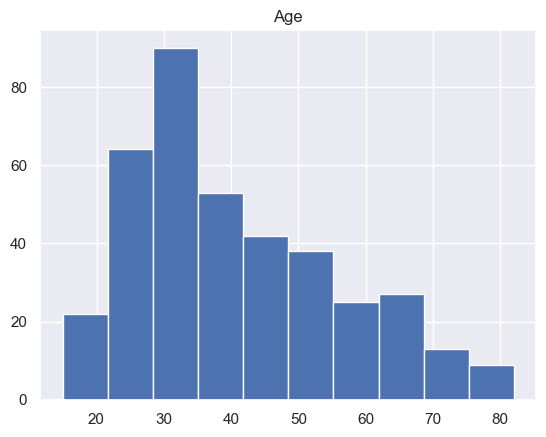

In [32]:
df[mas_int].hist()

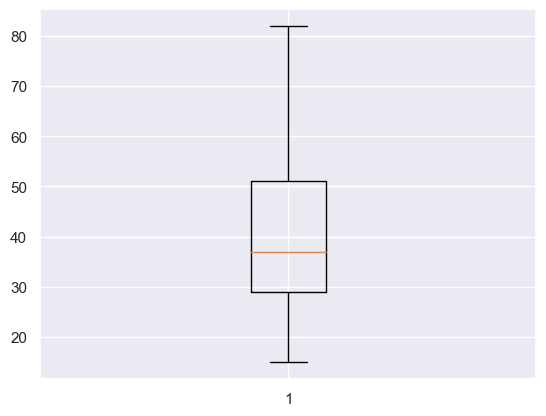

In [33]:
plt.boxplot(df[mas_int])
plt.show()

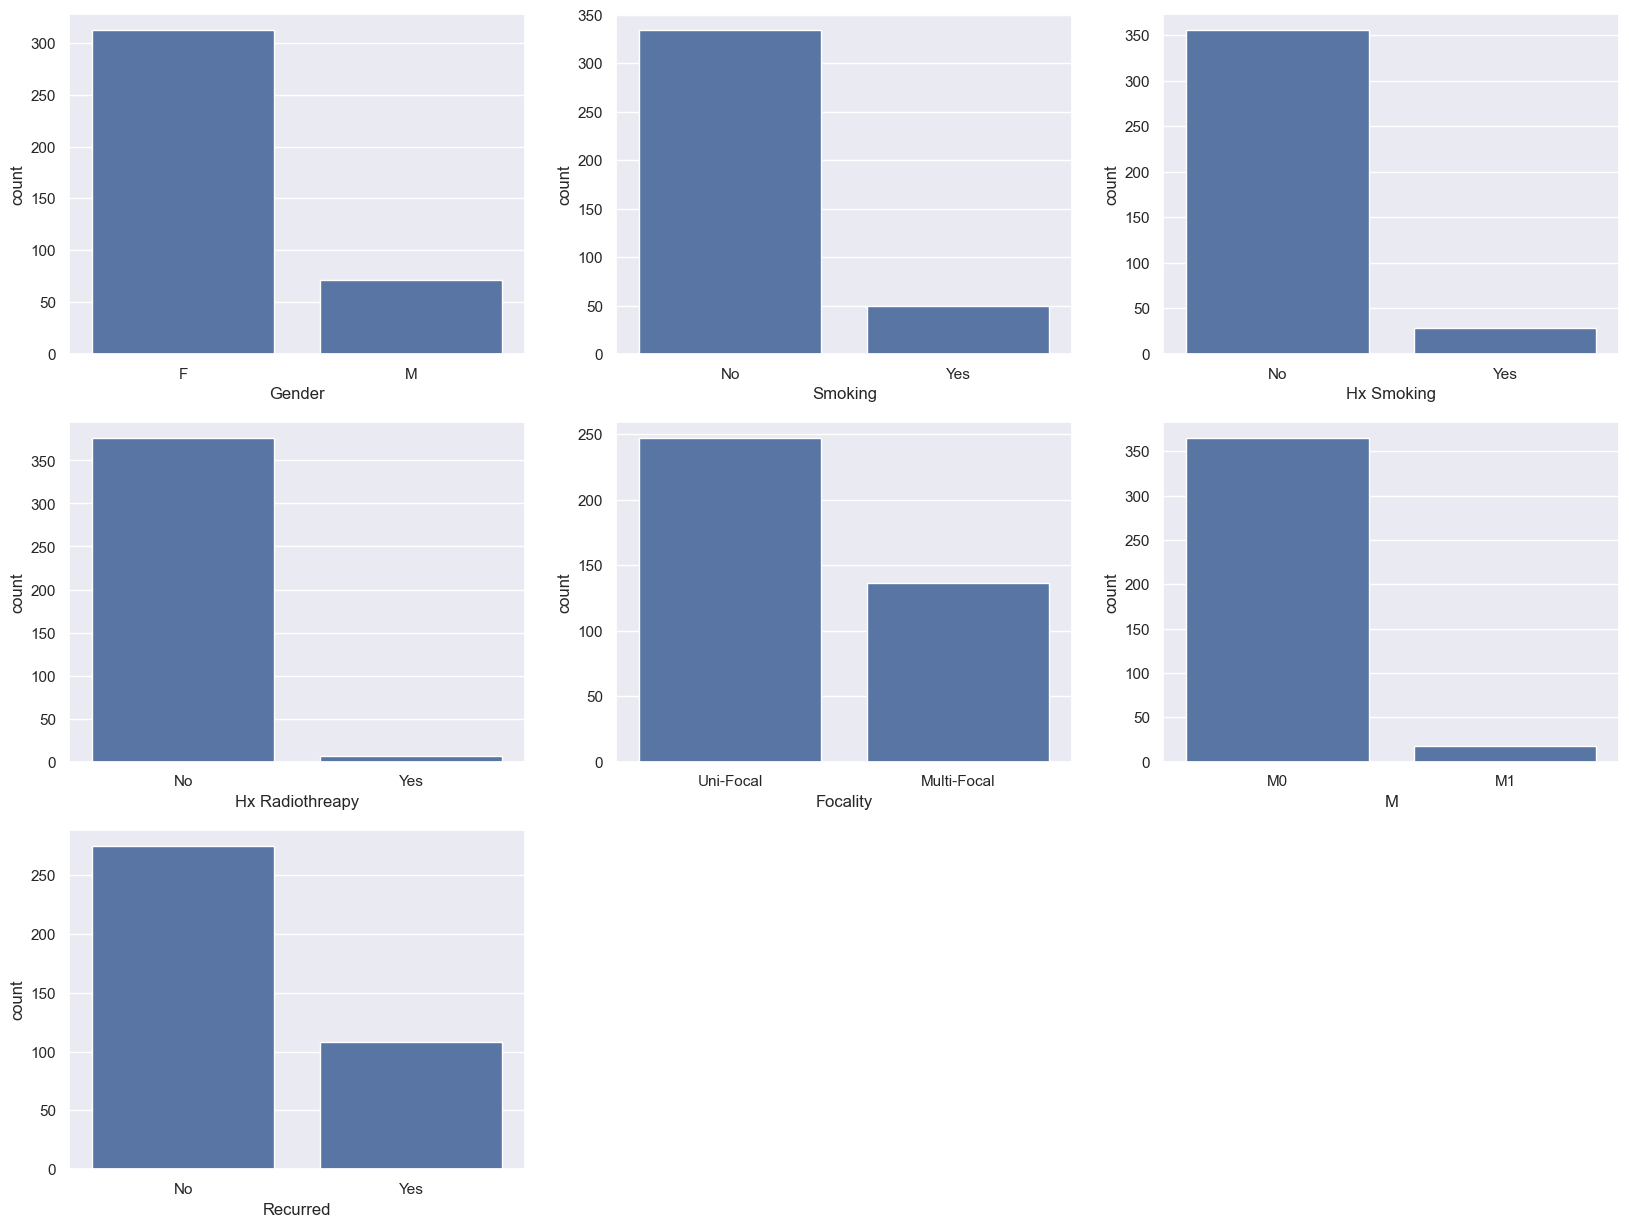

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

for col in enumerate(mas_bool):
    sns.countplot(data=df.replace(mapping[col[1]]), x=col[1], ax= axes[col[0] // 3, col[0] % 3]);
axes[2][1].set_visible(False)
axes[2][2].set_visible(False)
plt.show()

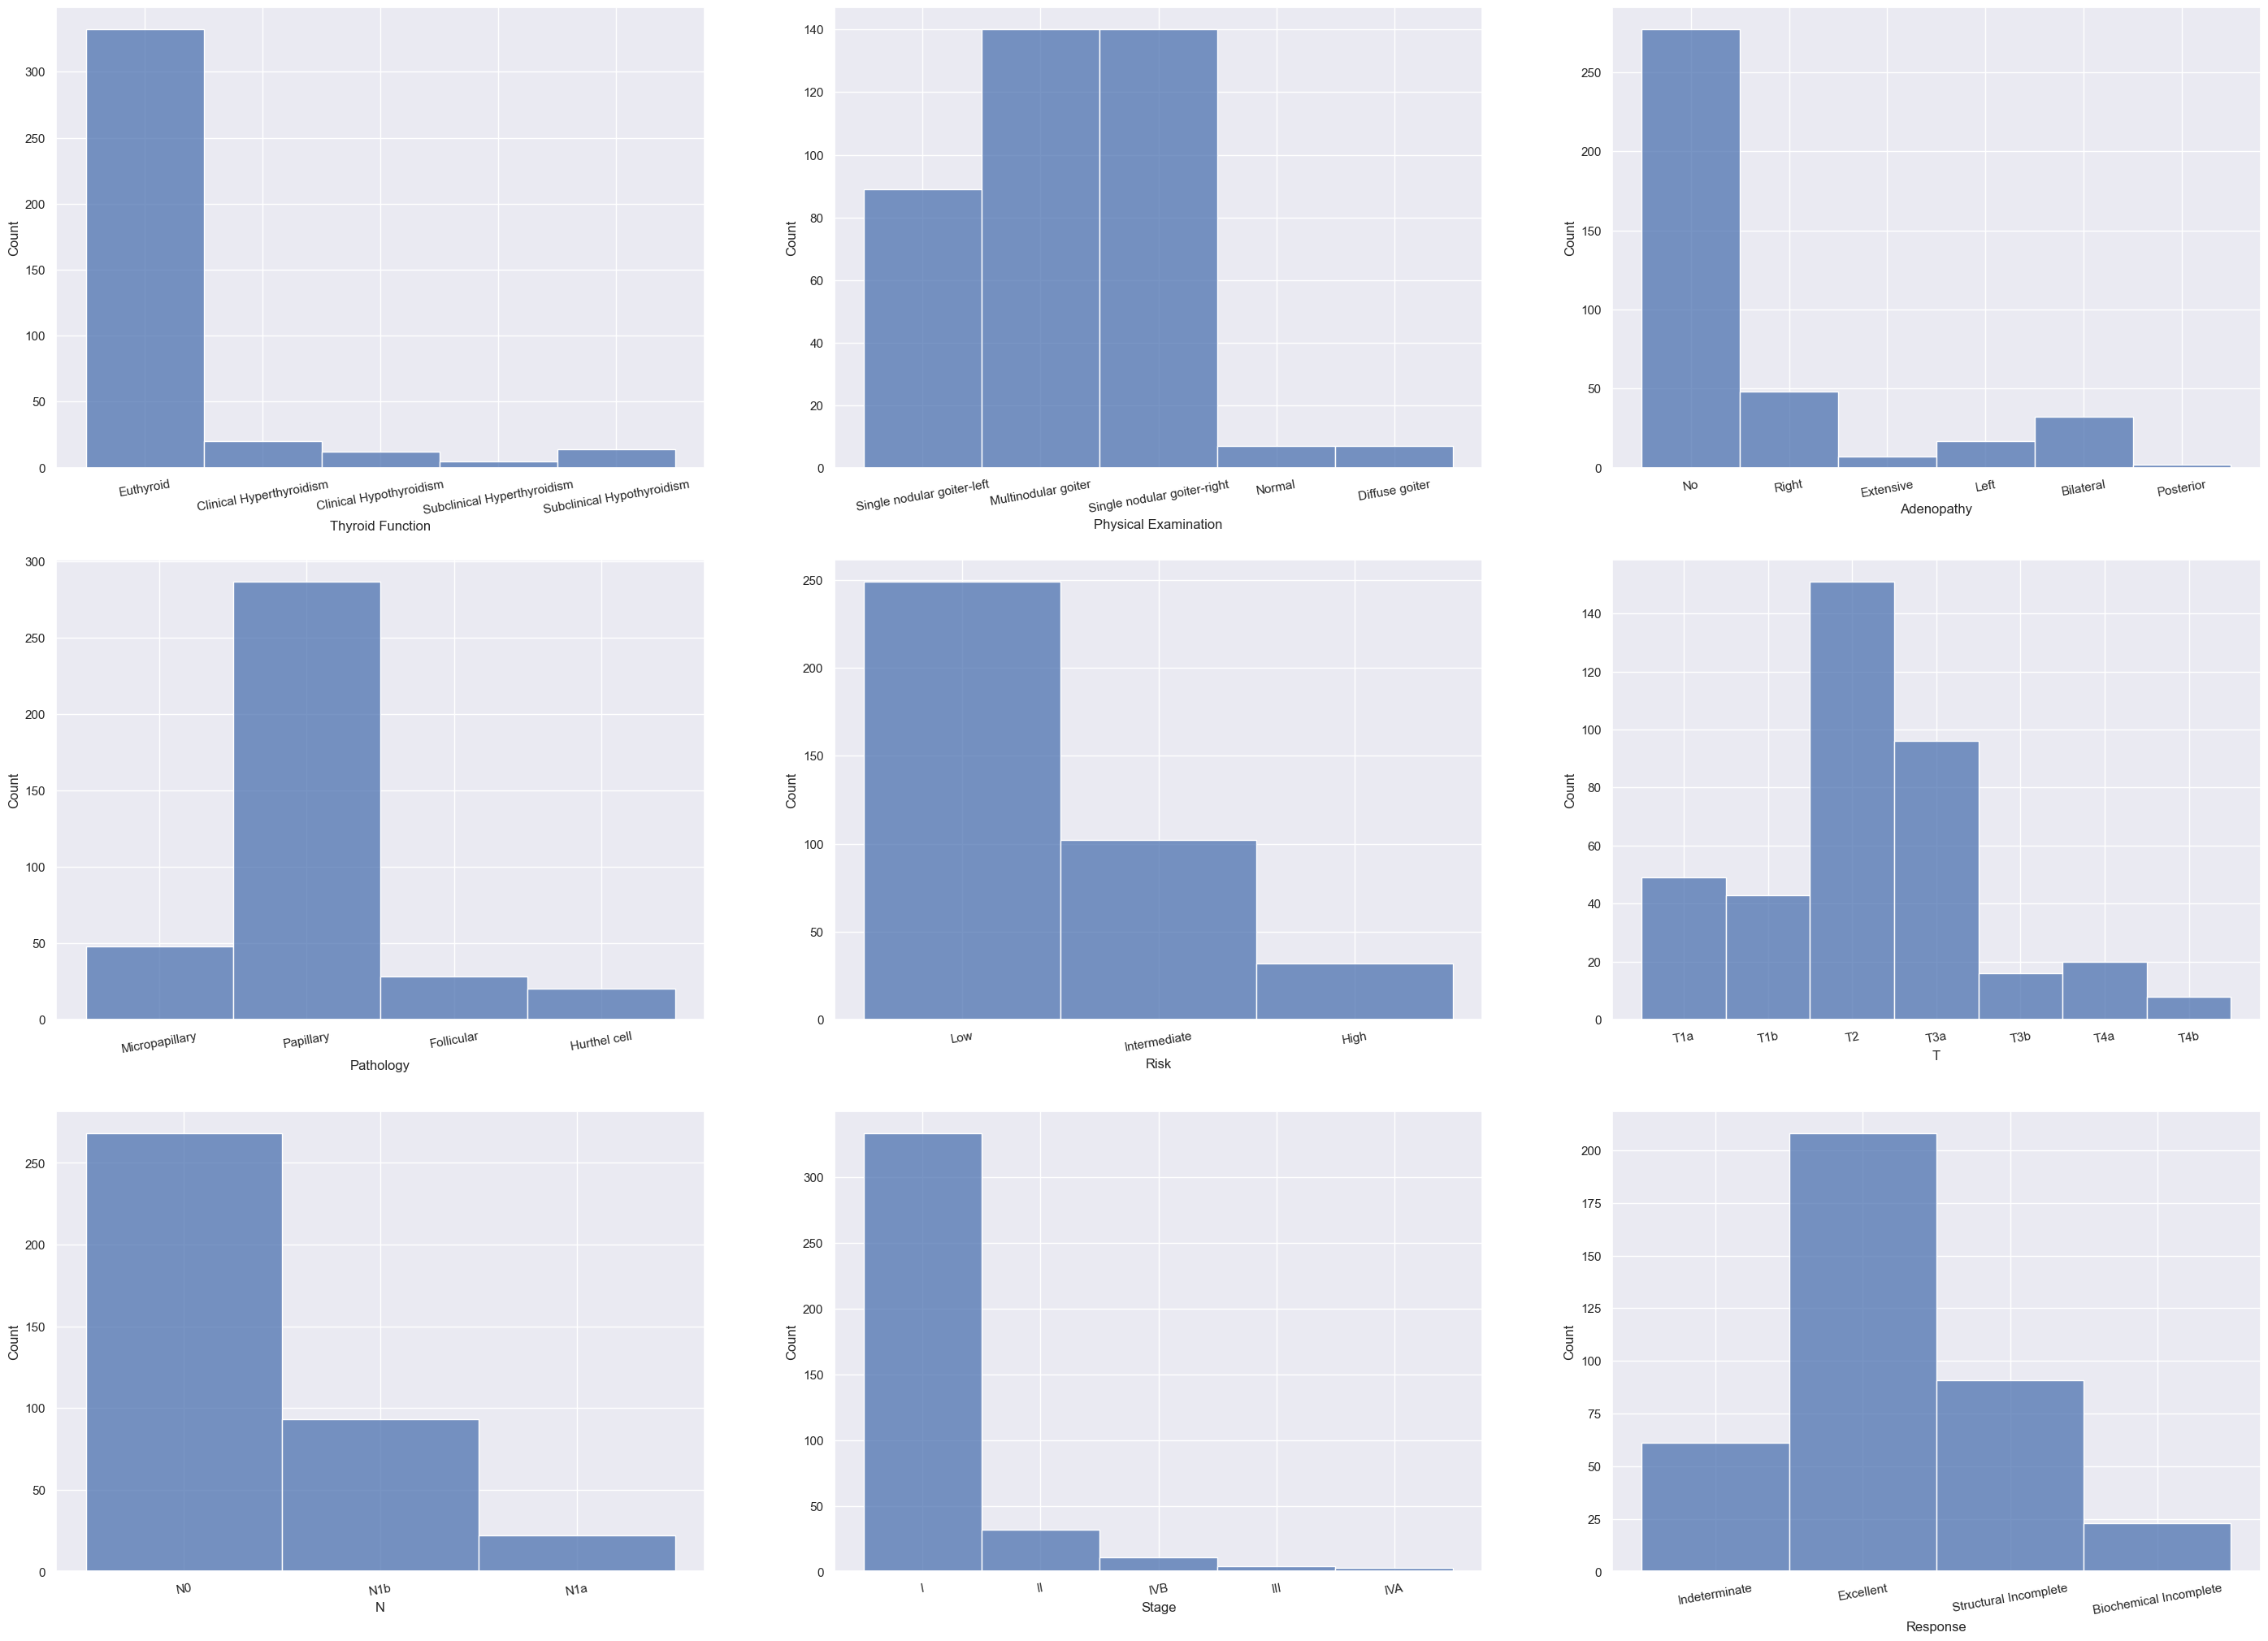

In [35]:
from matplotlib.ticker import FixedLocator, FixedFormatter
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(35, 25))

for col in enumerate(mas_others):
    ax= axes[col[0] // 3, col[0] % 3]
    sns.histplot(data=df, x=col[1], ax = ax)
    tick_labels = ax.get_xticklabels()

    locator = FixedLocator(range(len(tick_labels)))
    formatter = FixedFormatter([label.get_text() for label in tick_labels])

    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
plt.show()

In [36]:
mas_others

Index(['Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Risk', 'T', 'N', 'Stage', 'Response'],
      dtype='object')

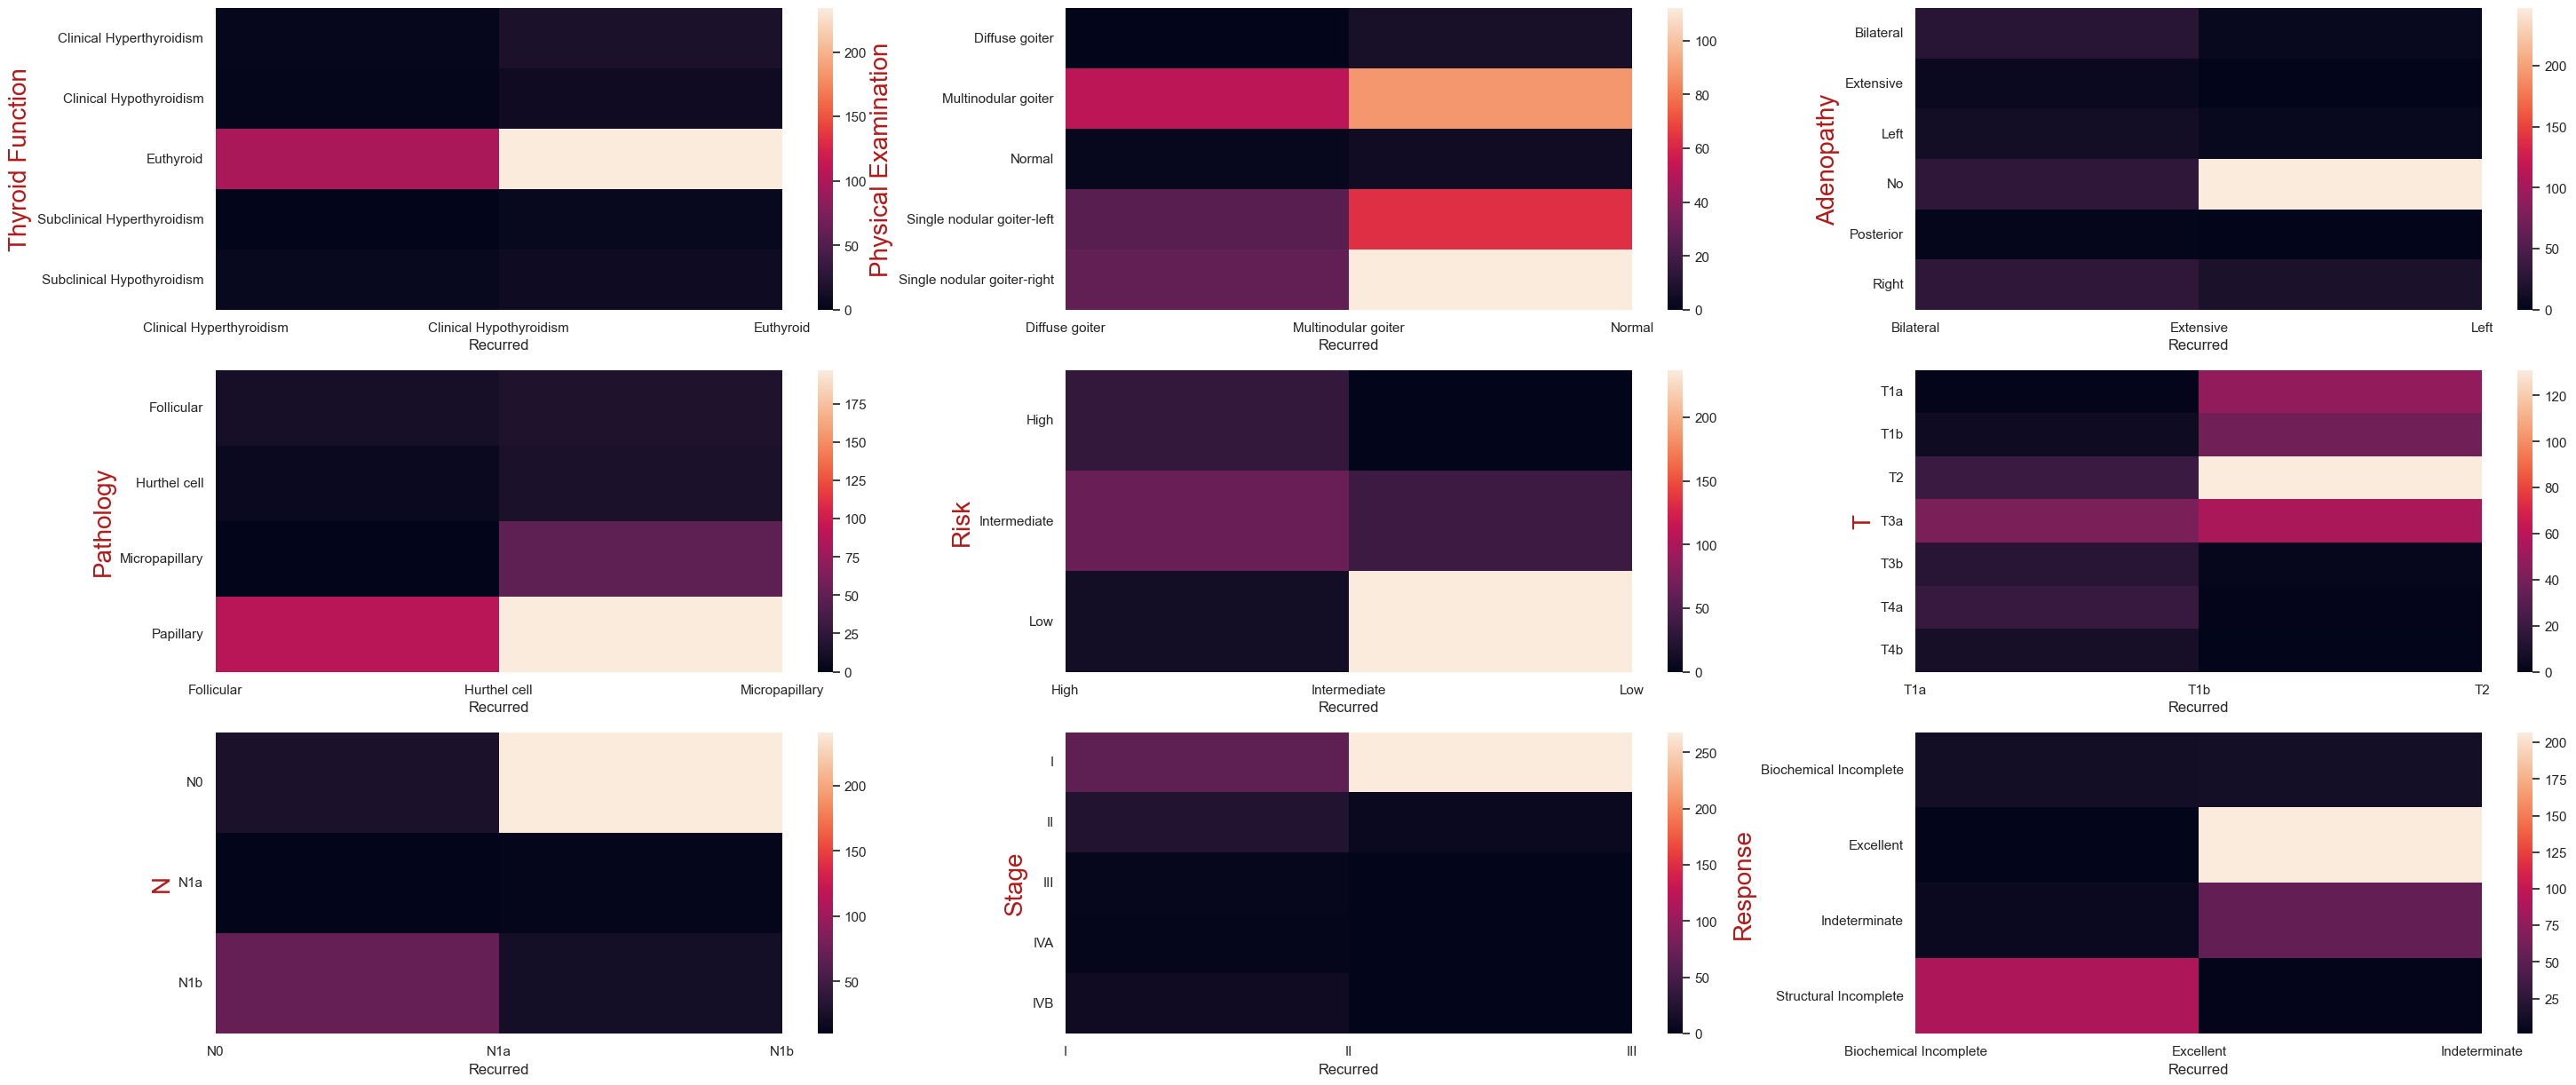

In [37]:
# sns.heatmap(pd.crosstab(df[mas_others[0]], df['Recurred']))

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(35, 15))
for col in enumerate(mas_others):
    ax= axes[col[0] // 3, col[0] % 3]
    sns.heatmap(pd.crosstab(df[col[1]], df['Recurred']), ax=ax)
    tick_labels = ax.get_yticklabels()

    locator = FixedLocator(range(len(tick_labels)))
    formatter = FixedFormatter([label.get_text() for label in tick_labels])

    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_ylabel(ax.get_ylabel(), fontsize=20, color=(0.7,0.1,0.1))
plt.show()